In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from   scipy.stats  import ttest_1samp, ttest_ind
import statsmodels.stats.api as sm
import os

In [3]:
os.chdir('D:\\My Greatlearning\\2.SMDM\\Project')

In [4]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [5]:
df.head() # Table 1. Data Sample

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


# A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.describe() 

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.describe(include='all').T # consider this one for final inference Table 2. Summary of the Data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [9]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [10]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [11]:
df['Total Spent']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [12]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [13]:
df.groupby('Region')['Total Spent'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Spent, dtype: int64

In [14]:
df.groupby('Channel')['Total Spent'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total Spent, dtype: int64

In [15]:
df.groupby(['Region','Channel'])['Total Spent'].sum() # Take this for final inference

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total Spent, dtype: int64

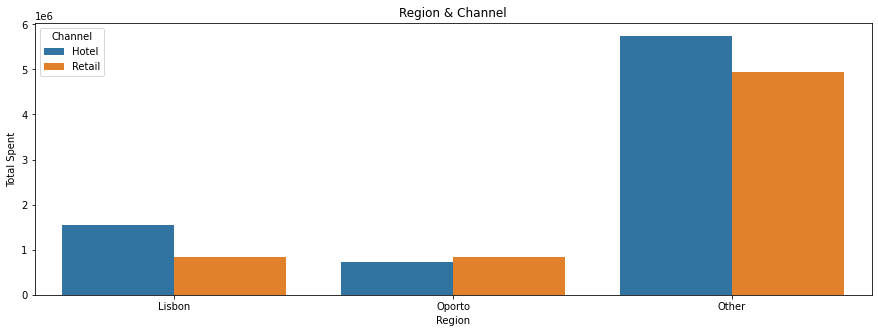

In [16]:
## Fig 1 Total Spent according to Region & Channel
dfnew = df.drop(['Buyer/Spender'], axis= 1)
fig = dfnew.groupby(['Region','Channel']).sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x=fig['Region'], y=fig['Total Spent'], hue='Channel', data =fig);
plt.title('Region & Channel');

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [18]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [19]:
## Table 3. Summary as per Region
df['Total Spent']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
Q2= df.groupby('Region').sum()
Q2new=Q2.drop(["Buyer/Spender","Total Spent"],axis=1)
Q2new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


<Figure size 720x360 with 0 Axes>

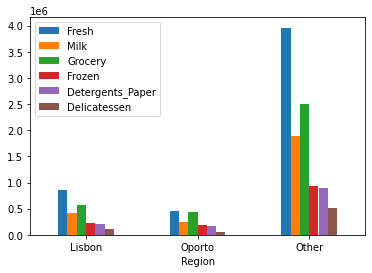

In [20]:
plt.figure(figsize=(10,5))
Q2new.plot.bar(rot=0); # Fig 2 

In [21]:
Q2= df.groupby('Channel').sum()
Q2new=Q2.drop(["Buyer/Spender","Total Spent"],axis=1)
Q2new
## Table 3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


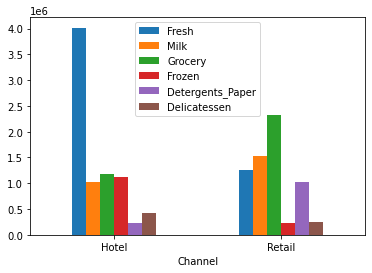

In [22]:
Q2new.plot.bar(rot=0); # Fig 3

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [23]:
std=round(df.std(axis=0,numeric_only=True),2)

In [24]:
std

Buyer/Spender         127.16
Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
Total Spent         26356.30
dtype: float64

In [25]:
std_fresh=df['Fresh'].std()
mean_fresh=df['Fresh'].mean()
cv_fresh=(std_fresh/mean_fresh)
cv_fresh

1.0539179237473149

In [26]:
std_Milk=df['Milk'].std()
mean_Milk=df['Milk'].mean()
cv_Milk=(std_Milk/mean_Milk)
cv_Milk

1.2732985840065414

In [27]:
std_Grocery=df['Grocery'].std()
mean_Grocery=df['Grocery'].mean()
cv_Grocery=(std_Grocery/mean_Grocery)
cv_Grocery

1.1951743730016824

In [28]:
std_Frozen=df['Frozen'].std()
mean_Frozen=df['Frozen'].mean()
cv_Frozen=(std_Frozen/mean_Frozen)
cv_Frozen

1.5803323836352914

In [29]:
std_Detergents_Paper=df['Detergents_Paper'].std()
mean_Detergents_Paper=df['Detergents_Paper'].mean()
cv_Detergents_Paper=(std_Detergents_Paper/mean_Detergents_Paper)
cv_Detergents_Paper

1.6546471385005155

In [30]:
std_Delicatessen=df['Delicatessen'].std()
mean_Delicatessen=df['Delicatessen'].mean()
cv_Delicatessen=(std_Delicatessen/mean_Delicatessen)
cv_Delicatessen

1.8494068981158382

In [31]:
df.var()

Buyer/Spender       1.617000e+04
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
Total Spent         6.946546e+08
dtype: float64

In [32]:
print("The coefficient of Variance for Fresh is:",round(cv_fresh,2),"\nThe coefficient of Variance for Milk is:",round(cv_Milk,2),"\nThe coefficient of Variance for Grocery is:",round(cv_Grocery,2),"\nThe coefficient of Variance for Frozen is:",round(cv_Frozen,2),"\nThe coefficient of Variance for Detergents_Paper is:",round(cv_Detergents_Paper,2),"\nThe coefficient of Variance for Delicatessen is:",round(cv_Delicatessen,2))

The coefficient of Variance for Fresh is: 1.05 
The coefficient of Variance for Milk is: 1.27 
The coefficient of Variance for Grocery is: 1.2 
The coefficient of Variance for Frozen is: 1.58 
The coefficient of Variance for Detergents_Paper is: 1.65 
The coefficient of Variance for Delicatessen is: 1.85


### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

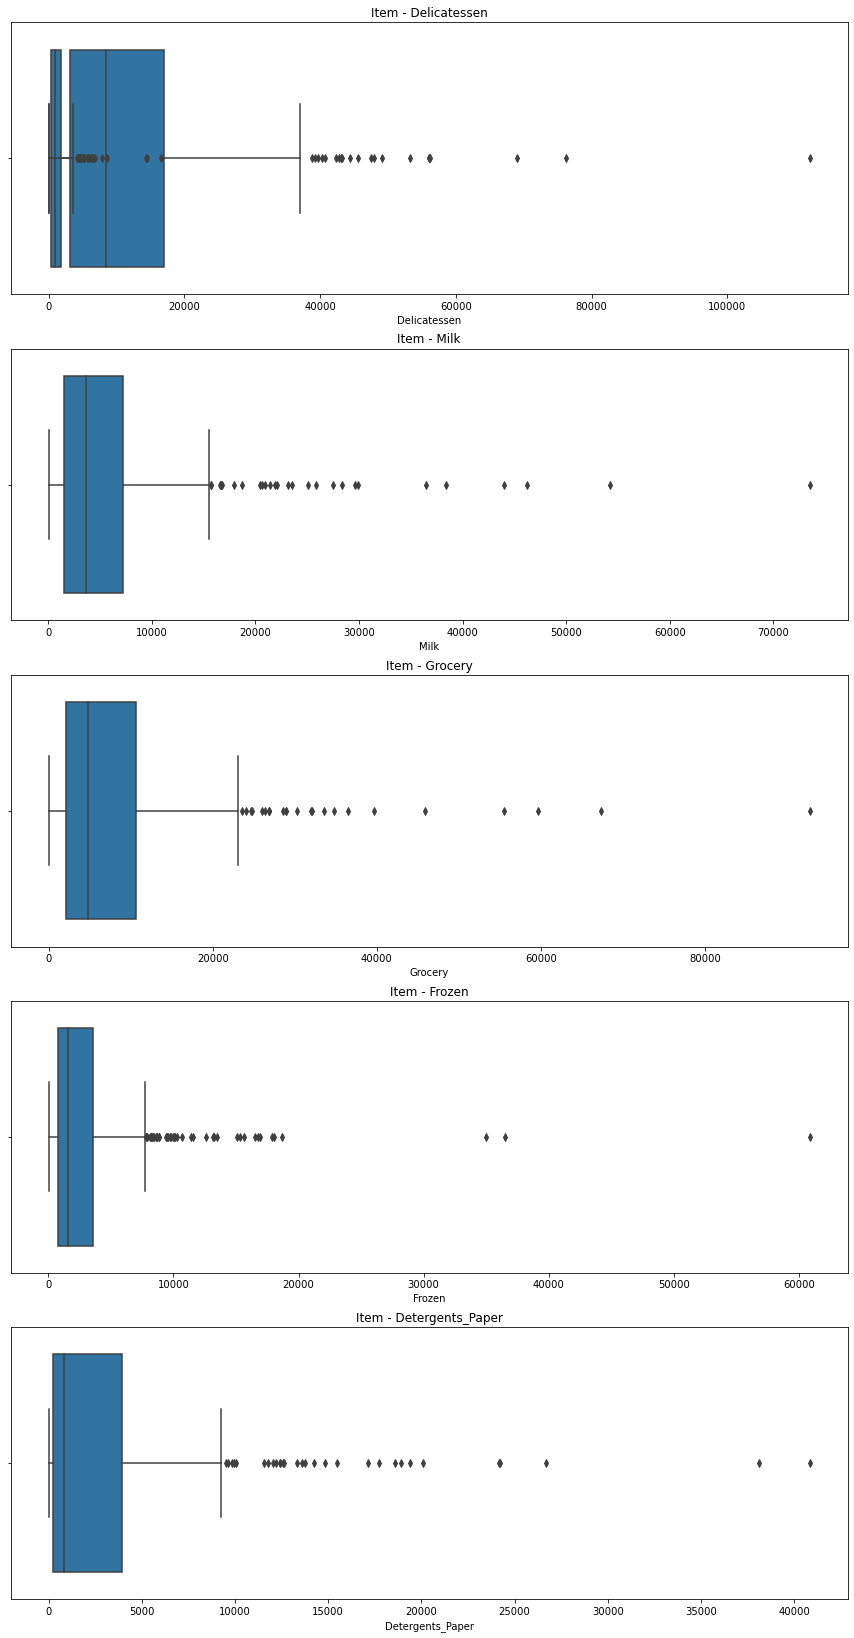

In [33]:
plt.figure(figsize=(15,35))
plt.subplot(6,1,1)
sns.boxplot(x='Fresh',data=df)
plt.title('Item - Fresh')

plt.subplot(6,1,2)
sns.boxplot(x='Milk',data=df)
plt.title('Item - Milk')

plt.subplot(6,1,3)
sns.boxplot(x='Grocery',data=df)
plt.title('Item - Grocery')

plt.subplot(6,1,4)
sns.boxplot(x='Frozen',data=df)
plt.title('Item - Frozen')

plt.subplot(6,1,5)
sns.boxplot(x='Detergents_Paper',data=df)
plt.title('Item - Detergents_Paper')

plt.subplot(6,1,1)
sns.boxplot(x='Delicatessen',data=df)
plt.title('Item - Delicatessen');

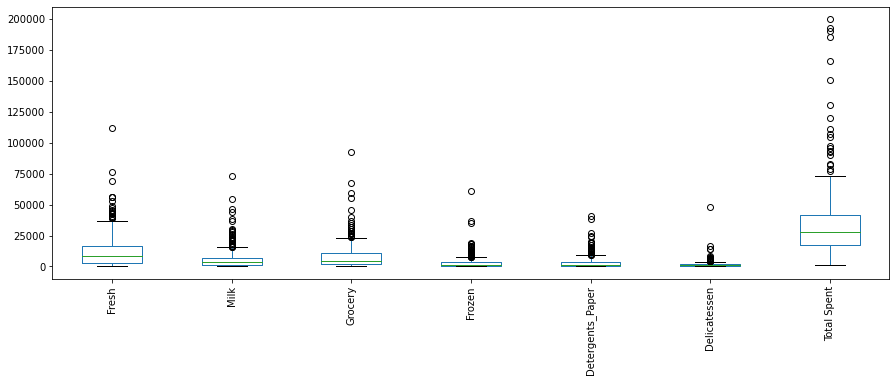

In [34]:
Q4= df.drop(['Buyer/Spender'], axis= 1)
plt.figure (figsize=(15,5))
Q4.boxplot(fontsize=None,rot=90,grid=False);
plt.show();

## Fig 4

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates

In [35]:
dfs=pd.read_csv('Survey-1.csv')

In [36]:
dfs.head() ## Table 4

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [37]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [38]:
dfs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


In [39]:
pd.crosstab(dfs.Gender, dfs.Major) # Table.5 Contingency Table: Gender Vs Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [40]:
pd.crosstab(dfs.Gender, dfs['Grad Intention'])# Table.6 Contingency Table: Gender Vs Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [41]:
pd.crosstab(dfs.Gender, dfs['Employment'])# Table.7 Contingency Table: Gender Vs Employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [42]:
pd.crosstab(dfs.Gender, dfs['Computer'])# Table.8 Contingency Table: Gender Vs Computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [43]:
No_of_male = (dfs['Gender'] =='Male').sum()
print("Total number of males are:",No_of_male)
No_of_female = (dfs['Gender'] =='Female').sum()
print('Total number of females are:',No_of_female)
Total_value =dfs['Gender'].value_counts().sum()
print('Total value of Gender is:',Total_value)

Total number of males are: 29
Total number of females are: 33
Total value of Gender is: 62


In [44]:
p_male = No_of_male/Total_value

print('The probability that a randomly selected CMSU student will be male is:',(p_male)*100)

The probability that a randomly selected CMSU student will be male is: 46.774193548387096


In [45]:
p_female= No_of_female/Total_value

print('The probability that a randomly selected CMSU student will be female is:',(p_female)*100)

The probability that a randomly selected CMSU student will be female is: 53.2258064516129


In [46]:
pd.crosstab(dfs['Gender'], dfs['Major'],margins = True,normalize='index') # Table.9

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [47]:
dfs['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [48]:
dfs.groupby(['Gender', 'Grad Intention']).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [49]:
pd.crosstab(dfs.Gender, dfs['Grad Intention'],margins = True,normalize='index') # Table no 10. Gender Vs Grad Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [50]:
dfs['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [51]:
dfs.groupby(['Gender', 'Computer']).size()

Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [52]:
pd.crosstab(dfs.Gender, dfs['Computer'],margins = True,normalize='index') # Table no 11 Gender Vs Computer and 1 - 0.8787 is the ans

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


In [53]:
dfs['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [54]:
No_of_fulltime_emp = (dfs['Employment'] =='Full-Time').sum()
No_of_fulltime_emp

10

In [55]:
No_male_fulltime_emp = ((dfs['Employment'] =='Full-Time') & (dfs['Gender'] =='Male')).sum()
No_male_fulltime_emp

7

In [56]:
dfs.groupby(['Gender', 'Employment']).size()

Gender  Employment
Female  Full-Time      3
        Part-Time     24
        Unemployed     6
Male    Full-Time      7
        Part-Time     19
        Unemployed     3
dtype: int64

In [57]:
p_of_male_stu =No_of_male/Total_value
print('Probability of randomly selected student is male P(M)=',round((p_of_male_stu), 4)*100)

p_of_fulltime_emp =No_of_fulltime_emp/Total_value
print('Probability of randomly selected student has fulltime employment P(E)=',round((p_of_fulltime_emp), 4)*100)

p_of_male_fulltime_emp = No_male_fulltime_emp/Total_value
print('Probability of male having a fulltime employment P(M & E)=',round((p_of_male_fulltime_emp), 4)*100)

Probability of randomly selected student is male P(M)= 46.77
Probability of randomly selected student has fulltime employment P(E)= 16.13
Probability of male having a fulltime employment P(M & E)= 11.29


In [58]:
## P(M or E) = P(M)+P(E)-P(M&E)
P_MorE= p_of_male_stu+p_of_fulltime_emp-p_of_male_fulltime_emp
print(' The probability that a randomly chosen student is either a male or has full-time employment', P_MorE*100 ,'%')

 The probability that a randomly chosen student is either a male or has full-time employment 51.61290322580645 %


In [59]:
(dfs['Major'].value_counts())
(dfs.groupby(['Gender', 'Major']).size())
No_F_M= (dfs['Gender']=='Female').sum()
No_F_IB= ((dfs['Gender']=='Female') & (dfs['Major'] == 'International Business')).sum()
No_F_Man= ((dfs['Gender']=='Female') & (dfs['Major'] == 'Management')).sum()
Total=No_F_IB+No_F_Man
print('Total number of females majoring =',No_F_M)
print('Total number of females majoring in international business = ',No_F_IB)
print('Total number of females majoring in management =',No_F_Man)
print('Probability that given a female student is randomly chosen, she is majoring in international business or management',round((Total/No_F_M)*100, 2), "%")

Total number of females majoring = 33
Total number of females majoring in international business =  4
Total number of females majoring in management = 4
Probability that given a female student is randomly chosen, she is majoring in international business or management 24.24 %


In [60]:
dfs[dfs['Grad Intention'] == 'Undecided'].index
dfs_cont = dfs.drop(dfs[dfs['Grad Intention'] == 'Undecided'].index)
dfs_cont.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [61]:
pd.crosstab(dfs['Gender'] , dfs_cont['Grad Intention'] ,margins =True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [62]:
pd.crosstab(dfs['Gender'] , dfs_cont['Grad Intention'] ,margins =True,normalize='index')

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [63]:
print('The probability that a randomly selected Student is Female',(20/40)*100)

The probability that a randomly selected Student is Female 50.0


In [64]:
val2 =((dfs['Gender']=='Female') & (dfs_cont['Grad Intention'] == 'Yes')).sum()
print('The probability that a randomly selected student is female and intends to graduate is',(val2/20)*100, '%' )
print('They are not independent events')

The probability that a randomly selected student is female and intends to graduate is 55.00000000000001 %
They are not independent events


In [65]:
val2

11

In [66]:
less_3= (dfs['GPA'] < 3).sum()
print('No. of students that his/her GPA is less than 3 =',less_3)
print("Total value =",Total_value)

No. of students that his/her GPA is less than 3 = 17
Total value = 62


In [67]:
less_3 = (dfs['GPA'] < 3).sum()
P_less_3 =less_3/Total_value
print('The probability that his/her GPA is less than 3 is', (P_less_3)*100, '%')

The probability that his/her GPA is less than 3 is 27.419354838709676 %


In [68]:
pd.crosstab((dfs['Gender']=='Male'), (dfs['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [69]:
pd.crosstab((dfs['Gender']=='Female'), (dfs['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


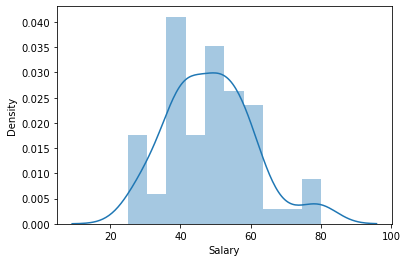

In [70]:
sns.distplot(dfs['Salary'], bins = 10, kde=True, rug= False);

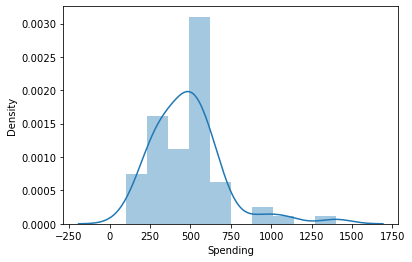

In [71]:
sns.distplot(dfs['Spending'], bins = 10, kde=True, rug= False);

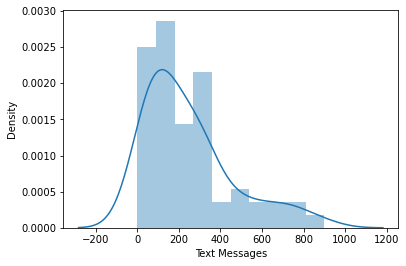

In [72]:
sns.distplot(dfs['Text Messages'], bins = 10, kde=True, rug= False);

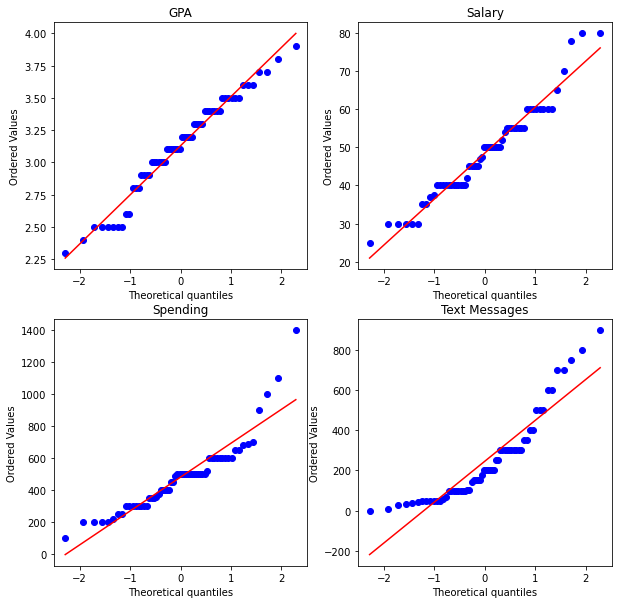

In [73]:
plt.figure(figsize=[10, 10])

plt.subplot(2, 2, 1)
stats.probplot(dfs['GPA'], plot=plt);
plt.title('GPA');


plt.subplot(2, 2, 2)
stats.probplot(dfs['Salary'], plot=plt);
plt.title('Salary');


plt.subplot(2, 2, 3)
stats.probplot(dfs['Spending'], plot=plt);
plt.title('Spending');


plt.subplot(2, 2, 4)
stats.probplot(dfs['Text Messages'], plot=plt);
plt.title('Text Messages');

## Fig 5

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


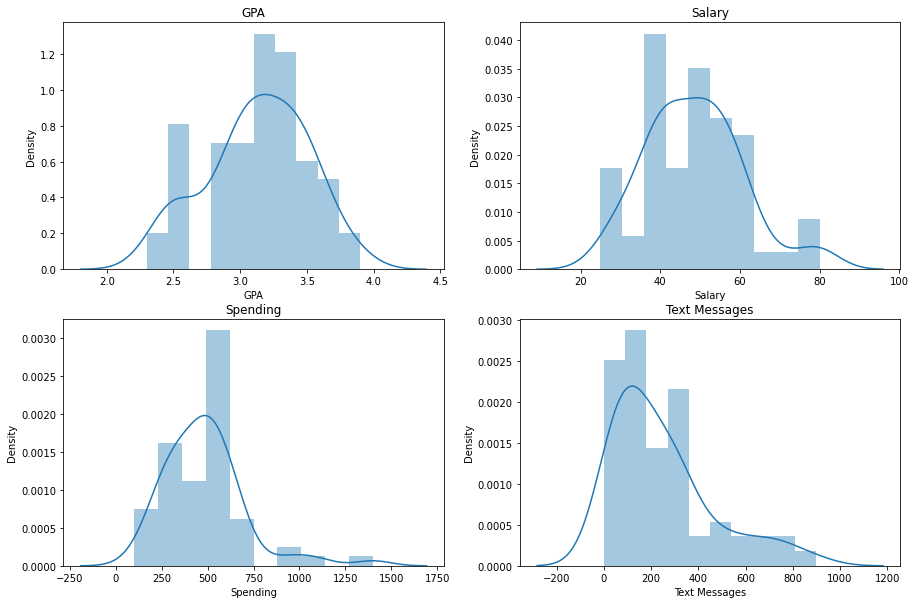

In [74]:
plt.figure(figsize=[15,10])

plt.subplot(2, 2, 1)
sns.distplot(dfs['GPA'], bins = 10, kde=True, rug= False);
plt.title('GPA');
print('skew value of GPA is', dfs['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(dfs['Salary'], bins = 10, kde=True, rug= False);
plt.title('Salary');
print('skew value of Salary is', dfs['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(dfs['Spending'], bins = 10, kde=True, rug= False);
plt.title('Spending');
print('skew value of Spending is', dfs['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(dfs['Text Messages'], bins = 10, kde=True, rug= False);
plt.title('Text Messages');
print('skew value of Text Message is', dfs['Text Messages'].skew())

### fig 6

In [75]:
df_ab=pd.read_csv('A+&+B+shingles.csv')

In [76]:
df_ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [77]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [78]:
df_ab.isnull().sum()

A    0
B    5
dtype: int64

In [79]:
df_ab.describe().T ## Table 14

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


### Step 1:

Testing whether the moisture content is less the permissible limit

The null hypothesis states that the moisture content of sample A is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

The alternative hypothesis states that the moisture content of sample A is less than permissible limit, 𝜇 < 0.35

𝐻0 : 𝜇 ≥ 0.35

𝐻𝐴 : 𝜇 < 0.35

### Step 2: Decide the significance level
Here we select 𝛼 = 0.05 as given in the question.

### Step 3: Identify the test statistic¶
We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for A sample. One tail test for sample A

### Step 4: Calculate the p - value and test statistic

In [80]:
t_statistic, p_value = ttest_1samp(df_ab['A'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -1.4735046253382782
P Value 0.07477633144907513


### Step 5: Decide to reject or accept null hypothesis

In [81]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is greater than permissible limit in sample A.')

one-sample t-test p-value= 0.07477633144907513
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is greater than permissible limit in sample A.


## Define Null and alternate hypothesis for sample B

### step 1:
Testing whether the moisture content is less the permissible limit

The null hypothesis states that the moisture content of sample B is greater or than equal to the permissible limit, 𝜇 ≥ 0.35

The alternative hypothesis states that the moisture content of sample B is less than permissible limit, 𝜇 < 0.35

𝐻0 : 𝜇 ≥ 0.35

𝐻𝐴 : 𝜇 < 0.35

### Step 2: Decide the significance level
Here we select 𝛼 = 0.05 as given in the question.

### Step 3: Identify the test statistic¶
We have two samples (A and B) and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for one sample test for B sample. one tail test for Sample B

### Step 4: Calculate the p - value and test statistic

In [82]:
t_statistic, p_value = ttest_1samp(df_ab['B'],0.35, nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191826


### Step 5: Decide to reject or accept null hypothesis

In [83]:
print ("one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the moisture content is less than permissible limit in sample B.')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the moisture content is less than permissible limit in sample B.


### Step 1:


### Define Null and alternate hypothesis

In testing whether the mean for shingles A and Shingles B are the same, the null hypothesis states that the mean of shingle A to mean of shingle B are the same, 𝜇A equals 𝜇B. The alternative hypothesis states that the mean are different, 𝜇A is not equal to 𝜇B

    1) 𝐻0 : 𝜇A is not equal to 𝜇B
    2) 𝐻𝐴 : 𝜇A equal to 𝜇B

### Step 2: Decide the significance level

Here we select 𝛼 = 0.05 and the population standard deviation is not known.


### Step 3: Identify the test statistic

We have two samples and we do not know the population standard deviation. Sample sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the tSTAT test statistic for two sample test.

### Step 4: Calculate the p - value and test statistic

In [84]:
t_statistic, p_value  = ttest_ind(df_ab['A'],df_ab['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.2896282719661123
P Value 0.2017496571835306


### Step 5: Decide to reject or accept null hypothesis

In [85]:
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')

else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that mean for shingles A and singles B are not the same')
    

two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that mean for shingles A and singles B are not the same
